# Explore here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'

data = pd.read_csv(url, delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
condiciones = [
    data['quality'] <= 4,
    data['quality'].between(5, 6),
    data['quality'] >= 7
]
valores = [0, 1, 2]
data['label'] = np.select(condiciones, valores)
data['label'].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

In [6]:
X = data.drop(["label", "quality"], axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy Score: 0.81875

Confusion Matrix:
 [[  0  13   0]
 [  1 243  20]
 [  0  24  19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.49      0.44      0.46        43

    accuracy                           0.82       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.78      0.82      0.80       320



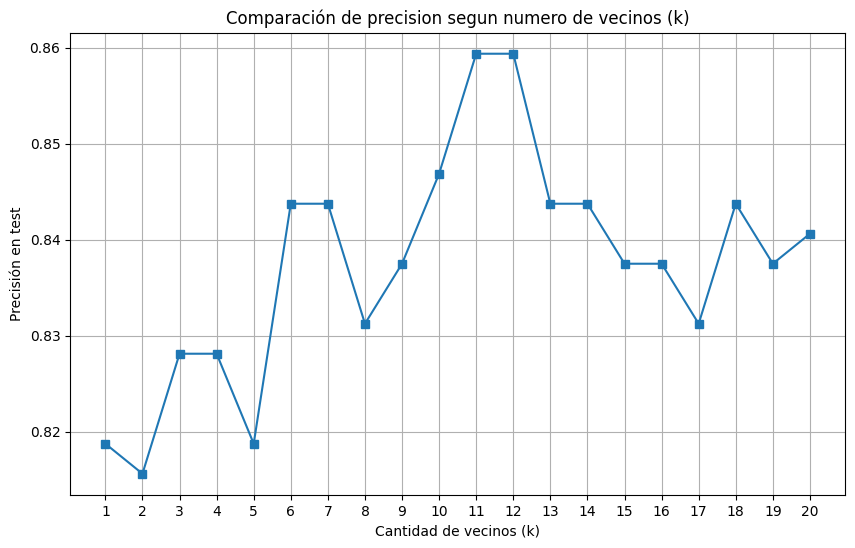

In [10]:
resultados = []
vecinos = range(1, 21)

for vecinos_k in vecinos:
    modelo_knn = KNeighborsClassifier(n_neighbors=vecinos_k)
    modelo_knn.fit(X_train_scaled, y_train)
    predicciones = modelo_knn.predict(X_test_scaled)
    precision = accuracy_score(y_test, predicciones)
    resultados.append(precision)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(vecinos, resultados, marker='s', linestyle='-')
plt.title('Comparación de precision segun numero de vecinos (k)')
plt.xlabel('Cantidad de vecinos (k)')
plt.ylabel('Precisión en test')
plt.xticks(vecinos)
plt.grid(True)
plt.show()

In [11]:
best_knn = KNeighborsClassifier(n_neighbors=12)
best_knn.fit(X_train_scaled, y_train)

dump(best_knn, open("knn.sav", "wb"))